# Imports
`Pandas` for data manipulation and analysis. `Numpy` for numerical operations. `Matplotlib` and `Seaborn` for plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from the csv file into a `Pandas` dataframe.

In [2]:
df = pd.read_csv('IMDB-Movie-Data - IMDB-Movie-Data.csv')

Print the first 5 rows of the dataframe

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Plots

## Bar chart of the number of movies released per year

The chart shows a significant increase in the number of movies released in 2016. Compared to the previous year, it had twice the amount of movies released.

Text(0.5, 1.0, 'Number of Movies by Year')

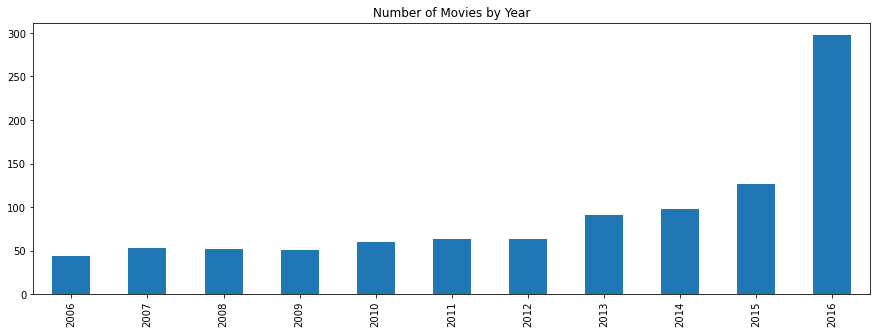

In [4]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Number of Movies by Year')

## Scatter Plot of Movie Ratings vs. Accrued Revenue

The plot shows the relation between a movie's rating and its revenue. Surprisingly, the relation is not linear. It means that a higher rated movie does not guarantee better revenue. Movies rated around the 7-8 range are usually that do well financially.

Text(0.5, 1.0, 'Movie Rating vs Revenue (Scatter Plot)')

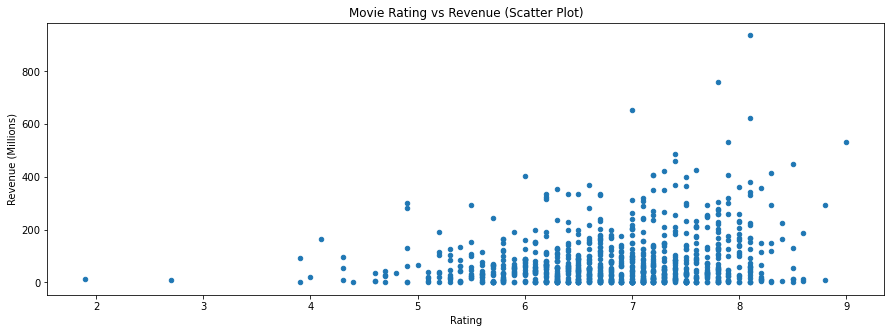

In [5]:
df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', figsize=(15, 5))
plt.title('Movie Rating vs Revenue (Scatter Plot)')

## Movie rating distribution

This plot shows the distribution of movie ratings. The distribution is skewed to the left, and most movies are rated around 6.0 to 7.5.

Text(0.5, 1.0, 'Movie Rating Distribution')

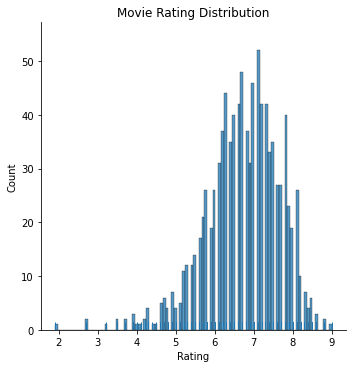

In [7]:
sns.displot(df['Rating'], bins=100, kde=False, rug=True)
plt.title('Movie Rating Distribution')

The following snippet is used to extract all genres present in the dataset. A movie's genres are stored as a comma separated string, so we split the string and the genres to a set.

In [8]:
# extract all genres present
genres = set()
for genre in df['Genre']:
    genres.update(genre.split(','))
print(genres)

{'Crime', 'Horror', 'Musical', 'Action', 'Thriller', 'Fantasy', 'Mystery', 'History', 'Comedy', 'Family', 'Adventure', 'Western', 'War', 'Sci-Fi', 'Biography', 'Romance', 'Animation', 'Sport', 'Drama', 'Music'}


## Pie chart of movies per genre

The following chart illustrates the percentage of movies per genre. The most common genre is Drama, followed by Action and Comedy.

Text(0.5, 1.0, 'Movie Count by Genre (Pie Chart)')

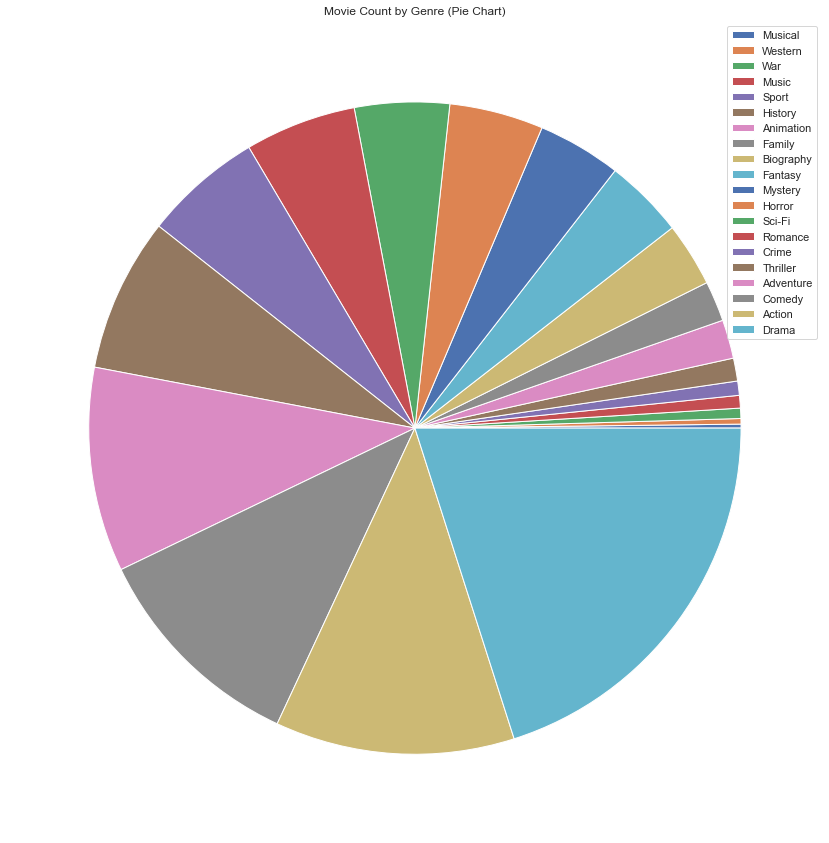

In [10]:
genre_count = dict()
for genre in genres:
  genre_count[genre] = 0
for genre in df['Genre']:
  for g in genre.split(','):
    genre_count[g] += 1
  
plt.figure(figsize=(15, 15))
genre_count = {k: v for k, v in sorted(genre_count.items(), key=lambda item: item[1])}
plt.pie(genre_count.values())
plt.legend(genre_count.keys(), loc='best')

sns.set(style='whitegrid')
plt.title('Movie Count by Genre (Pie Chart)')

## Joint Plot of IMDb ratings vs Metascore ratings

This plot presents the relation between IMDb ratings and Metascore ratings. The plot shows that there is a positive correlation between the two ratings. Most movies have their IMDb ratings around 5 to 8 and Metascore ratings around 30 to 80. And due to a larger range, the movies can be more differentiable by their Metascore ratings.

Text(0.5, 1.0, 'Metascore - Rating relation (Joint Plot)')

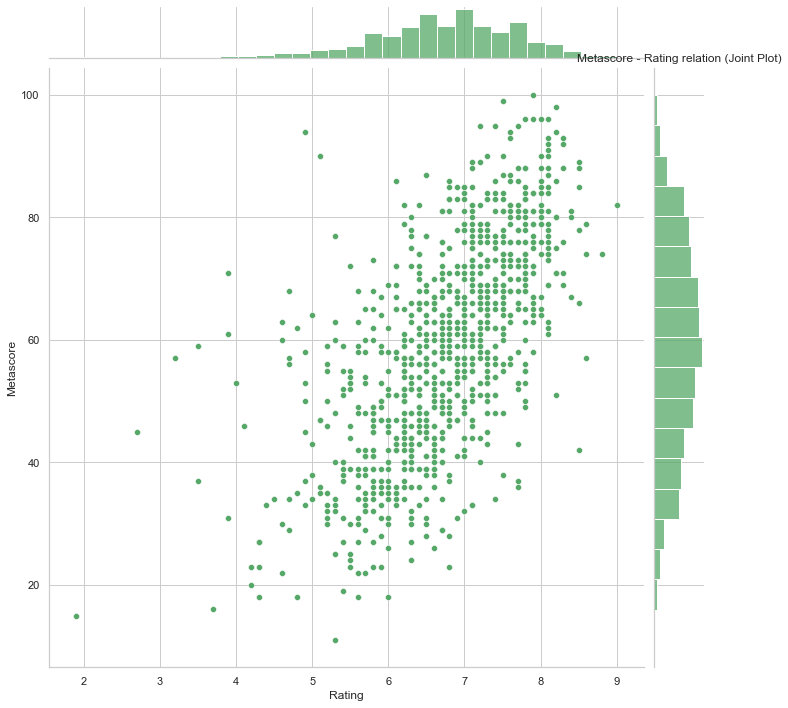

In [11]:
sns.jointplot(x='Rating', y='Metascore', data=df, height=10, ratio=10, color='g')
plt.title('Metascore - Rating relation (Joint Plot)')

## Change in average movie runtime over the years

The runtime of movies has been decreasing over the years. The average runtime of movies in 2016 is around 105 minutes, while the average runtime of movies in 2006 was around 120 minutes. The plot also shows that a similar decrease was also prevalent around 2010 before it went back to 120 minutes at 2012. This means that even though the runtime has been changing since 2012, we cannot conclude from this that future years will also see movies with reduced runtimes.

<AxesSubplot:xlabel='Year'>

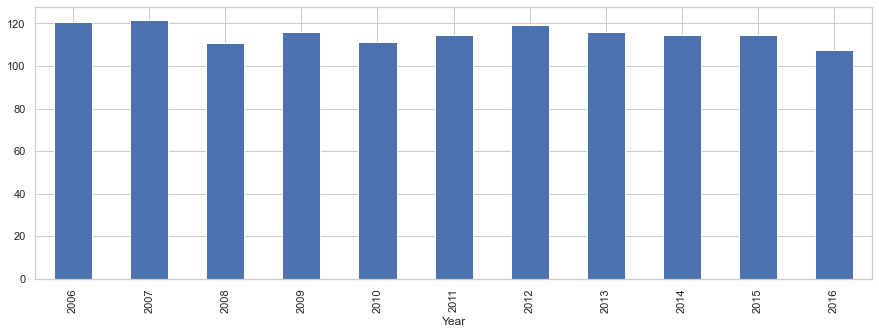

In [12]:
plt.figure(figsize=(15, 5))
df.groupby('Year')['Runtime (Minutes)'].mean().plot(kind='bar')

## Box plot of Average ratings for each Genre

A box plot is used to show the distribution of ratings for each genre. The plot shows that the `Fantasy` genre has the most variation in ratings, ranging from sub-6 to 7.5. While the `Biography` genre has the least variation, consistently being rated from 7 to 8.5. `Animation` and `War` films have the highest average ratings of around 7.5. It is also interesting to note that `Horror` films have the lowest average rating of around 6.0.

Text(0.5, 1.0, 'Movie Genres and Average Rating (Box Plot)')

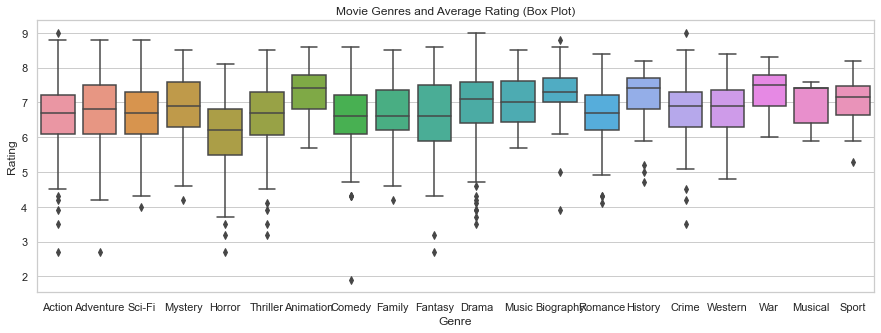

In [13]:
plt.figure(figsize=(15, 5))
df = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Movie Genres and Average Rating (Box Plot)')